<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/Stroke_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'your_username' # username
os.environ['KAGGLE_KEY'] = 'your_key' # key

In [2]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset


In [5]:
# Load your data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Overview of Dataset

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# Drop unnecessary columns
df.drop('id', axis=1, inplace=True)

<ipython-input-11-692c949f4f63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('id', axis=1, inplace=True)


In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# EDA

In [13]:
def pieplot(df, column, only_stroke=False):
    if only_stroke:
        # Filter the DataFrame to include only rows where stroke is 1
        filtered_df = df[df['stroke'] == 1]
        data = filtered_df[column].value_counts()
    else:
        data = df[column].value_counts()

    labels = data.index.tolist()

    plt.figure(figsize=(5, 5))
    plt.pie(data, labels=labels, autopct="%.0f%%", colors = ['lightcoral', 'lightblue'])
    plt.title(f"{column} distribution" + (" in stroke patients" if only_stroke else ""))
    plt.show()


In [14]:
def boxplot_side_by_side(df, column):
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 6))

    # Subplot for all patients
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'{column} Distribution in All Patients')
    plt.ylabel(column)

    # Subplot for stroke patients
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[df['stroke'] == 1][column])
    plt.title(f'{column} Distribution in Stroke Patients')
    plt.ylabel(column)

    # Show the plot
    plt.show()


**1. Distribution of Strokes in Sample Dataset**

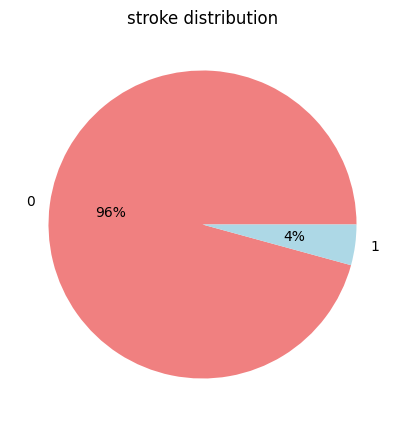

In [15]:
pieplot(df, "stroke",  only_stroke=False)

Imbalanced Data in Stroke Health Outcomes: Necessitating Resampling for Enhanced Analysis

**2. Gender Distribution in Stroke Patients**


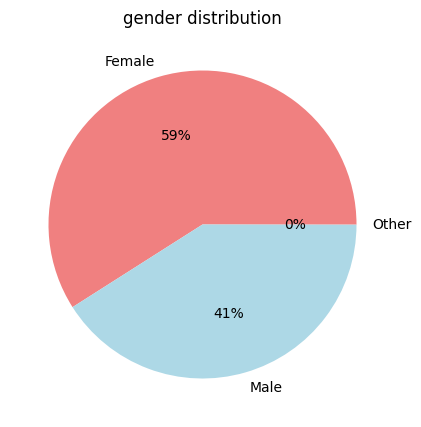

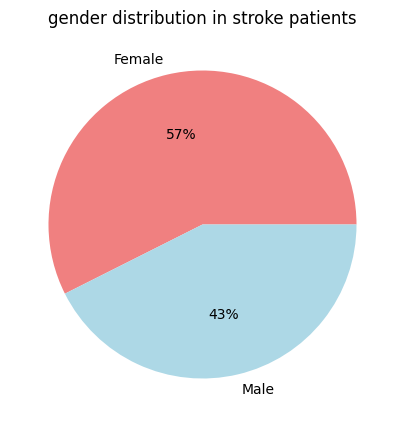

In [16]:
pieplot(df, "gender", only_stroke=False)
pieplot(df, "gender", only_stroke=True)

Based on the pie chart, the following insights can be drawn:

Female: Representing 57% of stroke cases, the data suggest a marginally higher prevalence of strokes among females.

Male: Comprising 43% of the stroke cases, males account for nearly half of the total instances.

However, it is important to note that the dataset contained more females (59%) than males (41%), so we cannot conclusively determine that females are more prone to strokes.

**3. Age among those who have stroke**

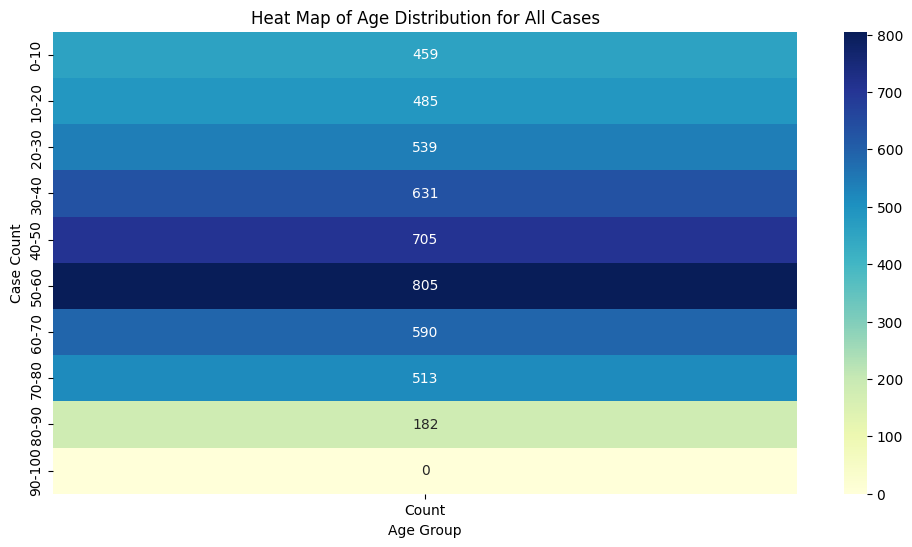

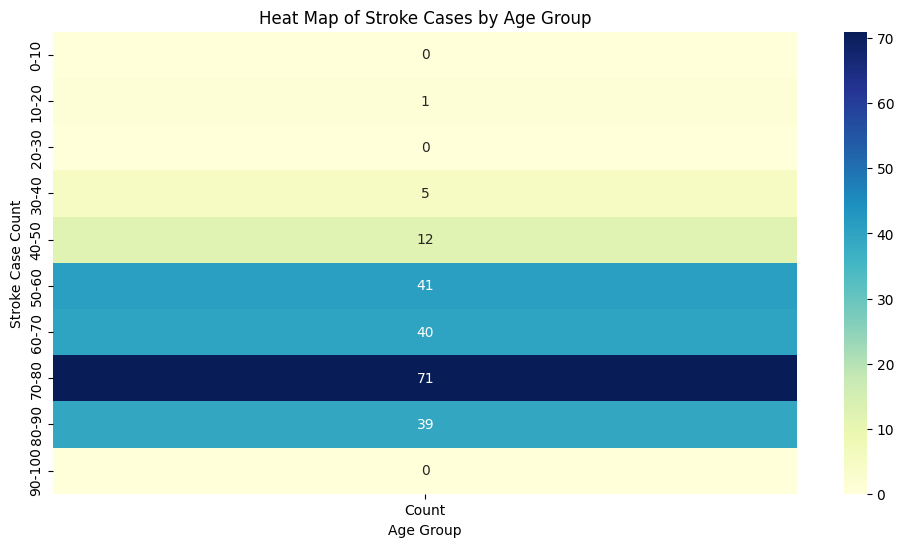

In [17]:
# Creating a new column for counting purposes
df['Count'] = 1

# Creating age bins
df['Age Group'] = pd.cut(df['age'], bins=list(range(0, 110, 10)), right=False, labels=[f"{i}-{i+10}" for i in range(0, 100, 10)])

# Pivot table for all data
pivot_table_all = df.pivot_table(values='Count', index='Age Group', aggfunc=np.sum)

# Pivot table for stroke cases
pivot_table_stroke = df[df['stroke'] == 1].pivot_table(values='Count', index='Age Group', aggfunc=np.sum)

# Heat Map for All Data
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_all, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heat Map of Age Distribution for All Cases')
plt.xlabel('Age Group')
plt.ylabel('Case Count')
plt.show()

# Heat Map for Stroke Cases
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_stroke, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heat Map of Stroke Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Case Count')
plt.show()


The data is well-distributed across various age groups, although there is a higher concentration of data for ages 30-60, with the 50-60 age group being the largest and the 80-90 age group the smallest (the 90-100 age group has no data). When examining the age distribution of stroke patients, the cases are primarily concentrated between ages 50 and 90, with the 70-80 age group having the highest incidence. Considering the smaller dataset for ages 80-90, which comprises 182 individuals, the occurrence of 39 stroke cases is proportionally much higher compared to other age groups. Overall, the heat map suggests an increasing risk of stroke with advancing age.

**4. Composition of Marital Status among Individuals Diagnosed with Stroke**

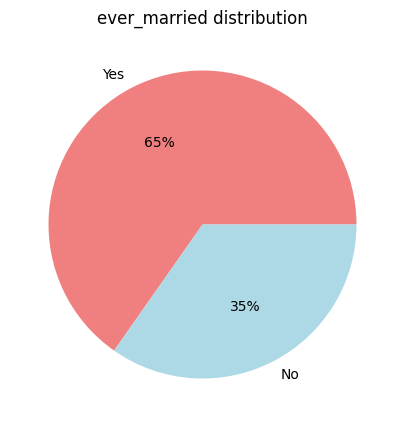

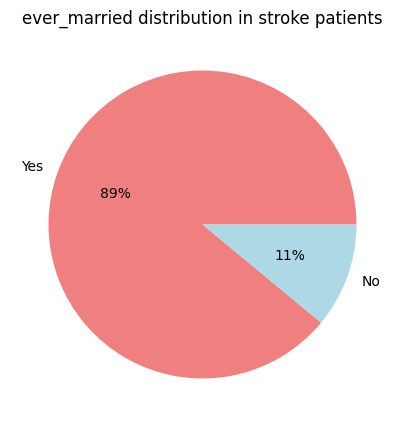

In [18]:
pieplot(df, "ever_married", only_stroke = False)
pieplot(df, "ever_married", only_stroke = True)

Based on the pie charts, the following observations can be made:

Single: Constituting 11% of stroke cases, single individuals are represented by the blue section of the chart.

Ever-Married: Individuals who have been married at least once make up 89% of stroke cases, as depicted by the pink section of the chart.

The data indicate that the incidence of stroke is higher in ever-married individuals, even after considering that the dataset predominantly comprises individuals who have been married at least once (65%).

**5. Work Type of People Diagnosed with Stroke**

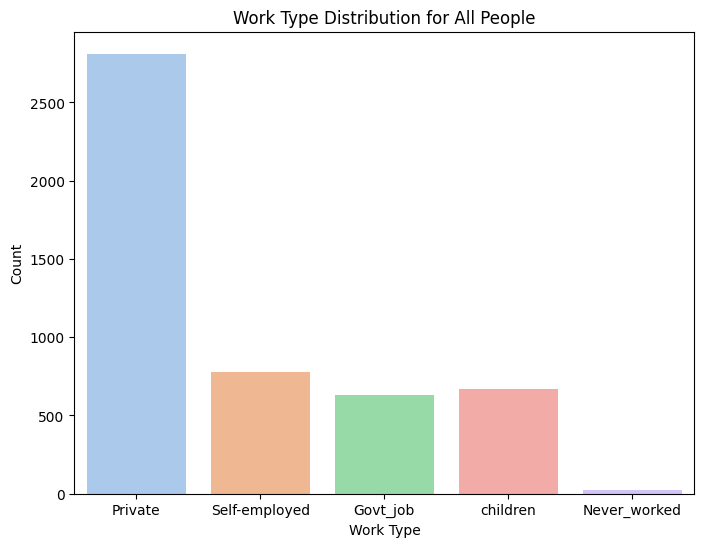

In [19]:
# Count Plot for Entire Data
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', data=df, palette='pastel')
plt.title('Work Type Distribution for All People')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

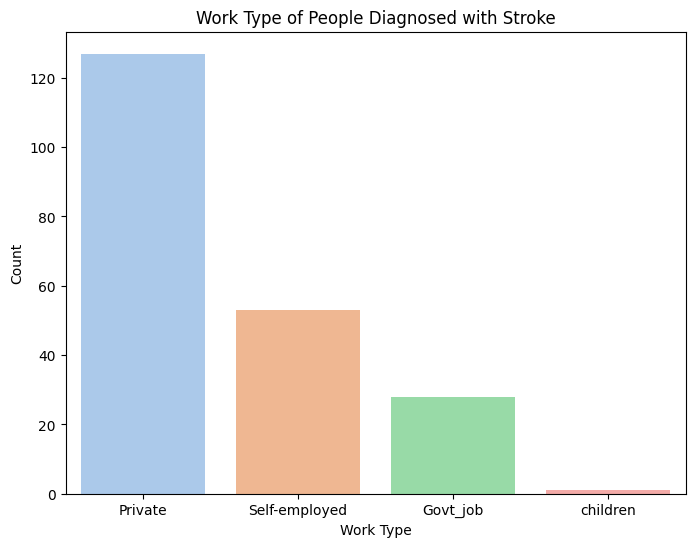

In [20]:
# Count Plot for People Diagnosed with Stroke
# Filter data for diagnosed stroke
diagnosed_stroke_data = df[df['stroke'] == 1]  # Assuming 'stroke' is numeric
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', data=diagnosed_stroke_data, palette='pastel')
plt.title('Work Type of People Diagnosed with Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()


Based on the bar graphs, we can infer the following:

Private: Represented by the tallest blue bar, individuals working in the private sector account for the highest incidence of stroke cases. However, considering that the dataset has a significantly higher percentage of samples from those working in the private sector, it's difficult to establish a direct association between working in the private sector and an increased risk of stroke.

Self-Employed: Individuals who are self-employed are shown by the orange bar and represent the second highest number of stroke cases among the analyzed groups. When compared to its overall sample size, it appears that the risk of stroke is higher for self-employed individuals.

Government Jobs: Those in government employment, depicted by the green bar, are observed to have the third highest count of stroke cases.

Children: Represented by the pink bar, children have the lowest incidence of stroke. Even when compared to their proportion in the overall dataset, the risk appears low, suggesting that younger individuals are less likely to have a stroke, indicating the influence of age on stroke risk.

These observations suggest that there is no concrete correlation between the type of employment and stroke risk, but age is a significant factor.

**6. Residence Type of People Diagnosed with Stroke**



In [21]:
import plotly.express as px

# Grouping the data by 'Residence Type' and 'Diagnosis'
residence_data = df.groupby(['Residence_type', 'stroke']).size().unstack().reset_index()

# Rename columns for meaningful legend labels
residence_data.columns = ['Residence_type', 'No Stroke', 'Stroke']

# Plotting a stacked bar chart using Plotly
fig = px.bar(residence_data, x='Residence_type', y=['No Stroke', 'Stroke'],
             title='Residence Type of People Diagnosed with and without Stroke',
             labels={'value':'Count', 'variable':'Diagnosis'},
             barmode='stack',
             color_discrete_sequence=['lightblue', 'lightcoral'])

# Update layout for clarity
fig.update_layout(
    xaxis_title='Residence Type',
    yaxis_title='Number of Cases',
    legend_title='Diagnosis',
    barmode='stack'
)

fig.show()



Based on the stacked bar graphs, the following insights can be drawn:

While there are more samples from urban areas, the distribution between urban and rural areas appears quite close in the dataset. Additionally, the proportion of stroke patients is almost the same in both settings, indicating that residence type does not seem to have a significant association with stroke risk.

**7. Smoking Status of People Diagnosed with Stroke**



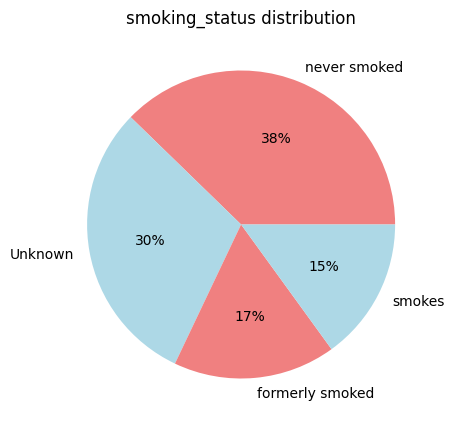

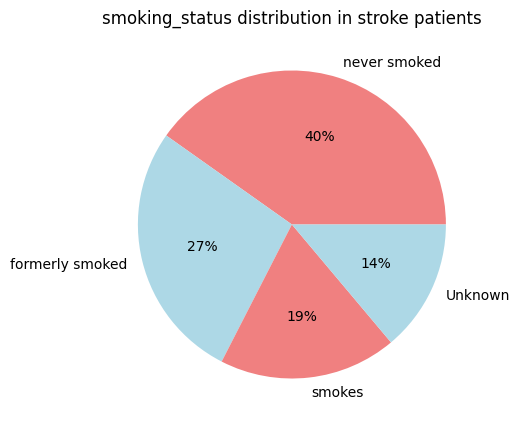

In [22]:
pieplot(df, "smoking_status", only_stroke = False)
pieplot(df, "smoking_status", only_stroke = True)

Based on the pie chart, the following observations can be made:

Never Smoked: Occupying the largest segment of the chart for both the entire dataset and for stroke patients, those who never smoked comprise 40.0% of stroke cases.

Formerly Smoked: Represented by the chart's second-largest segment, stroke patients who formerly smoked account for 27% of stroke cases.

Smokes: Stroke patients who currently smoke contribute to 19% of stroke cases.

These findings indicate a fairly uniform distribution of stroke cases across various smoking statuses, suggesting a minimal or no association with stroke risk.

**8. Presence of Hypertension in Individuals Diagnosed with Stroke**

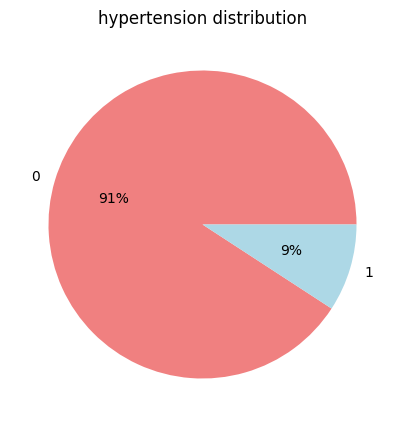

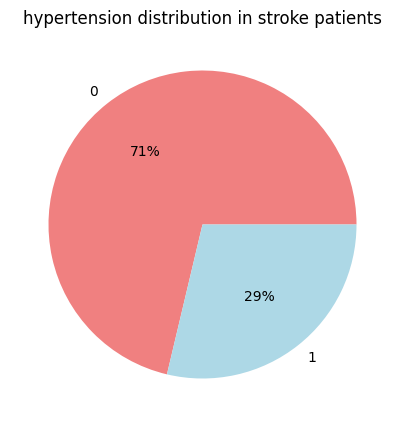

In [23]:
pieplot(df, "hypertension", only_stroke = False)
pieplot(df, "hypertension", only_stroke = True)

The pie chart suggests that 29% of stroke patients experienced hypertension, compared to the overall sample dataset where only 9% experienced hypertension. This suggests that stroke patients are more likely to experience hypertension.

**9. Presence of Heart Disease in Individuals Diagnosed with Stroke**

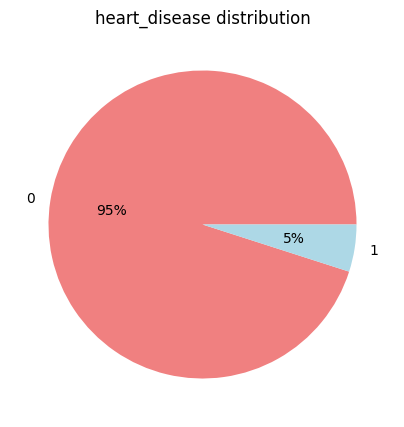

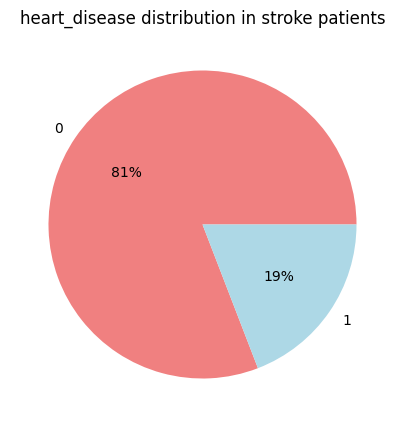

In [24]:
pieplot(df, "heart_disease", only_stroke = False)
pieplot(df, "heart_disease", only_stroke = True)

Based on the pie chart, there appears to be a significant difference in stroke occurrence between individuals with and without heart disease. Compared to 5% in the overall dataset who have heart diseases, 19% of stroke patients have heart diseases, suggesting a correlation between heart disease and the incidence of stroke.

**10. Diagnosis Values against Average Glucose Level & BMI**

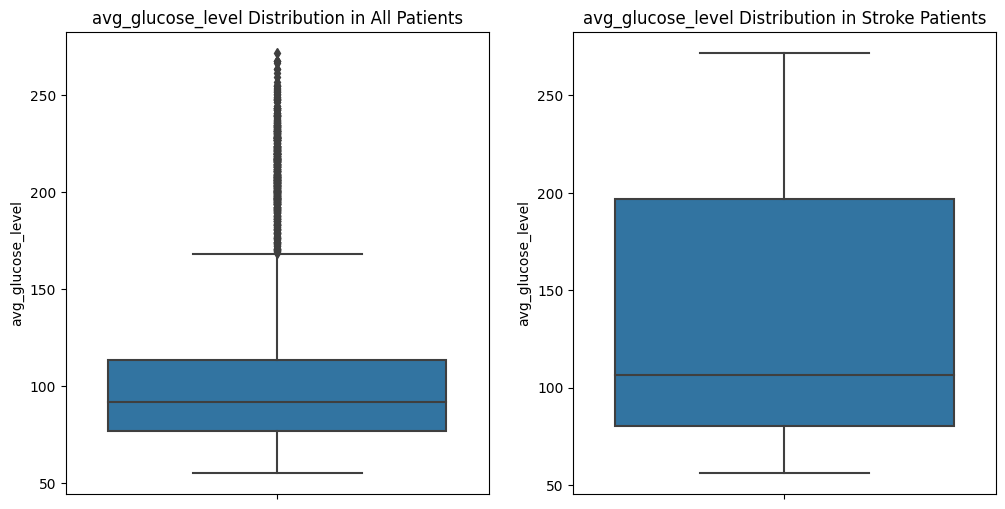

In [25]:
boxplot_side_by_side(df, 'avg_glucose_level')  # Replace with your column name

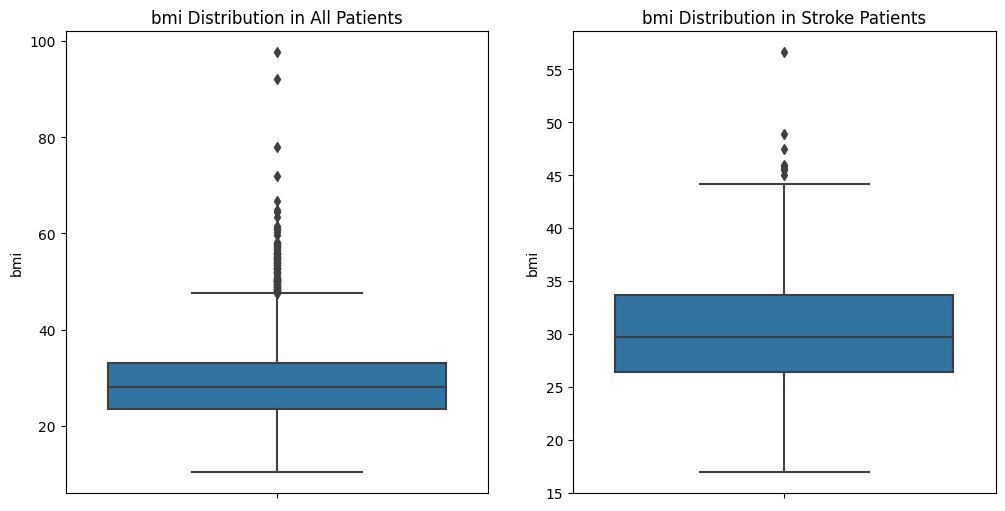

In [26]:
boxplot_side_by_side(df, 'bmi')  # Replace with your column name

The box graph suggests that avg glucose level and BMI values have considerable amount of outliers so I will remove the outliers for machine learning model.

# Outlier Removal

In [27]:
outlier_cols = ['bmi','avg_glucose_level']

def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3= df[column].quantile(.75)
    IQR = q3-q1

    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    ls = df.index[(df[column] <lower_bound) | (df[column] > upper_bound)]

    return ls

In [28]:
index_list = []

for column in outlier_cols:
    index_list.extend(detect_outliers(df,column))

# remove duplicated indices in the index_list and sort it
index_list = sorted(set(index_list))

before_remove = df.shape

df =df.drop(index_list)
after_remove = df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (4909, 13)
Shape of data after remove : (4260, 13)


# Data Processing

## Imbalance Data - Resampling

 To address the issue of class imbalance in a dataset, particularly focusing on balancing the number of instances between two classes for the 'stroke' variable

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier

In [30]:
# Separating data by class
df_0 = df[df['stroke'] == 0]
df_1 = df[df['stroke'] == 1]

# Checking the initial class distribution
print(df['stroke'].value_counts())

0    4124
1     136
Name: stroke, dtype: int64


In [31]:
from sklearn.utils import resample

# Upsampling the minority class
df_1_upsampled = resample(df_1, replace=True, n_samples=df_0.shape[0], random_state=123)


To balance the dataset, the minority class (df_1) is upsampled. Upsampling means increasing the number of instances in the minority class by randomly sampling with replacement until the class counts match the majority class. Here, df_1 is resampled to have the same number of instances as df_0.

In [32]:
# Concatenating the balanced data
df_balanced = pd.concat([df_0, df_1_upsampled])

df_balanced = df_balanced.drop(['Count', 'Age Group'], axis=1)

# Creating a DataFrame from the Balanced Data:
df = pd.DataFrame(df_balanced)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Visualize the balanced data
stroke_counts = df['stroke'].value_counts()
fig = px.pie(names=stroke_counts.index, values=stroke_counts.values, title='Stroke Occurrence', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


Data Balanced **Successfully**

## one-hot encoding

To convert categorical data into a numerical format that can be used in machine learning models

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_columns = df.drop(columns=categorical_columns).columns

# Separate categorical and numeric data
df_categorical = df[categorical_columns]
df_numeric = df[numeric_columns]


In [34]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder
df_categorical_encoded = encoder.fit_transform(df_categorical)

# Convert the encoded data into a DataFrame
df_categorical_encoded = pd.DataFrame(df_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Reset the index of df_numeric to concatenate properly
df_numeric.reset_index(drop=True, inplace=True)

# Concatenate the numeric and encoded categorical data
df_encoded = pd.concat([df_numeric, df_categorical_encoded], axis=1)

# View the encoded DataFrame
print(df_encoded.head())

df = df_encoded

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   3.0             0              0              95.12  18.0       0   
1  58.0             1              0              87.96  39.2       0   
2   8.0             0              0             110.89  17.6       0   
3  70.0             0              0              69.04  35.9       0   
4  14.0             0              0             161.28  19.1       0   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0          1.0           0.0               0.0                     0.0   
1          1.0           0.0               1.0                     0.0   
2          0.0           0.0               0.0                     0.0   
3          0.0           0.0               1.0                     0.0   
4          1.0           0.0               0.0                     1.0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                0.0                      0.0  

## Feature Correlation

 the one-hot encoded features and the target variable 'stroke

In [35]:
# Compute the correlation matrix
correlation_matrix_one_hot = df_encoded.corr()

# Compute the correlation of each feature with the target variable 'stroke'
target_corr_one_hot = correlation_matrix_one_hot['stroke'].drop('stroke')

# Sort correlation values in descending order
target_corr_sorted_one_hot = target_corr_one_hot.sort_values(ascending=False)

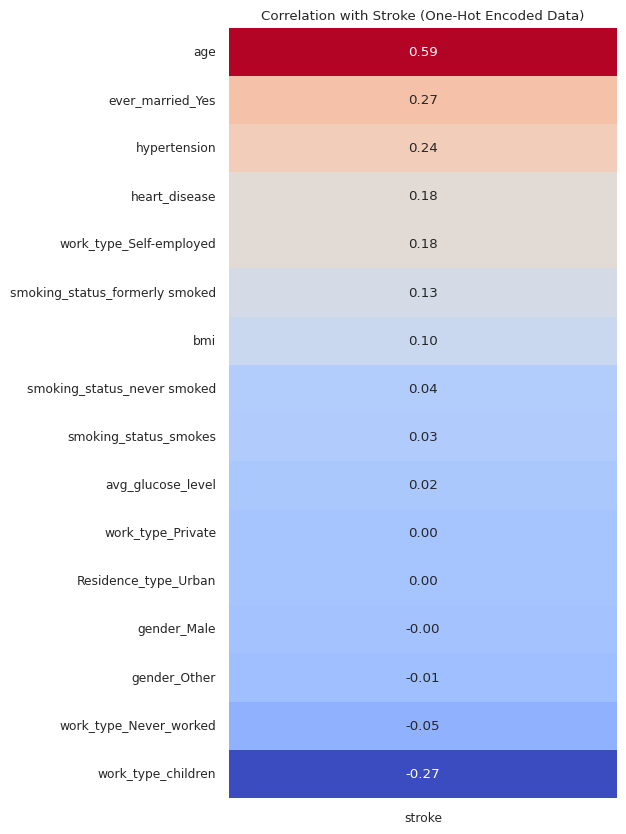

In [36]:
# Plot a heatmap of the correlations with the target column
plt.figure(figsize=(5, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted_one_hot.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Stroke (One-Hot Encoded Data)')
plt.show()


## Data Split

In [37]:
# feauture vs target
x = df.drop('stroke', axis = 1)
y = pd.to_numeric( df['stroke'])

In [38]:
# data scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [39]:
# training data vs testing data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20)

# Machine Learning

**Compared vairous machine learning models and their F1 scores**


I have selected the variables that are shown to have some relationship with stroke status based on the above feature ranking.

In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

evaluation_results = {}


# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    # "Random Forest Classifier": RandomForestClassifier(),
    # "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05),
    # "XGBoost Classifier": XGBClassifier(n_estimators=100, learning_rate=0.05),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    # "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, learning_rate=0.05),
    "SVC classifier": SVC()
}

# Function to evaluate models
def evaluate_model(true, predicted, is_regression=False):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return accuracy, precision, recall, f1, roc_auc

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model
    y_test_pred = model.predict(x_test)  # Make predictions

    # Evaluate Test dataset
    accuracy, precision, recall, f1, roc_auc = evaluate_model(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    print("- ROC AUC Score: {:.4f}".format(roc_auc))
    print('='*35)
    print('\n')

 # Store results in dictionary
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Convert the dictionary to DataFrame
results_df = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Display the DataFrame
print(results_df)


Logistic Regression
Model performance for Test set
- Accuracy: 0.7600
- Precision: 0.7432
- Recall: 0.7937
- F1 Score: 0.7676
- ROC AUC Score: 0.7600


Decision Tree Classifier
Model performance for Test set
- Accuracy: 0.9861
- Precision: 0.9728
- Recall: 1.0000
- F1 Score: 0.9862
- ROC AUC Score: 0.9861


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.9564
- Precision: 0.9196
- Recall: 1.0000
- F1 Score: 0.9581
- ROC AUC Score: 0.9564


SVC classifier
Model performance for Test set
- Accuracy: 0.8830
- Precision: 0.8426
- Recall: 0.9417
- F1 Score: 0.8894
- ROC AUC Score: 0.8831


                          Accuracy  Precision    Recall  F1 Score  \
Logistic Regression       0.760000   0.743182  0.793689  0.767606   
Decision Tree Classifier  0.986061   0.972845  1.000000  0.986236   
K-Neighbors Classifier    0.956364   0.919643  1.000000  0.958140   
SVC classifier            0.883030   0.842562  0.941748  0.889398   

                          ROC AUC Score  
L

## Ensemble algorithm

An ensemble algorithm combines the predictions from multiple machine learning algorithms to make more accurate predictions than any individual model. The core principle behind ensemble methods is that a group of weak learners (models) can come together to form a strong learner.



Mainly two types of ensemble methods:

**Bagging (Bootstrap Aggregating):**

In bagging, multiple models (usually of the same type) are trained in parallel on different subsets of the training data.
The subsets are created by randomly sampling the training dataset with replacement (bootstrap sampling).
Each model makes its predictions independently, and the final output is determined by averaging these predictions (in regression) or by majority voting (in classification).

Ex) Random Forest algorithm, where many decision trees are trained on different subsets of the data and their predictions are averaged.


**Boosting:**

Boosting works by sequentially training models, where each new model attempts to correct the errors made by the previous models.
In contrast to bagging, boosting assigns more weight to the instances in the training dataset that were incorrectly predicted, making the subsequent models focus more on these difficult cases.
The final prediction is a weighted sum of the predictions made by the individual models.

Ex) AdaBoost, Gradient Boosting Machine (GBM), and eXtreme Gradient Boosting (XGBoost)


In [41]:
from sklearn.ensemble import BaggingClassifier

evaluation_results = {}

# Define the models
models = {
    "Bagging Classifier": BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=10),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05),
    "XGBoost Classifier": XGBClassifier(n_estimators=100, learning_rate=0.05),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, learning_rate=0.05),
}

# Function to evaluate models
def evaluate_model(true, predicted, is_regression=False):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return accuracy, precision, recall, f1, roc_auc

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model
    y_test_pred = model.predict(x_test)  # Make predictions

    # Evaluate Test dataset
    accuracy, precision, recall, f1, roc_auc = evaluate_model(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    print("- ROC AUC Score: {:.4f}".format(roc_auc))
    print('='*35)
    print('\n')


 # Store results in dictionary
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }


    # Convert the dictionary to DataFrame
results_df = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Display the DataFrame
print(results_df)


Bagging Classifier
Model performance for Test set
- Accuracy: 0.9715
- Precision: 0.9460
- Recall: 1.0000
- F1 Score: 0.9723
- ROC AUC Score: 0.9715


Random Forest Classifier
Model performance for Test set
- Accuracy: 0.9970
- Precision: 0.9940
- Recall: 1.0000
- F1 Score: 0.9970
- ROC AUC Score: 0.9970


Gradient Boosting Classifier
Model performance for Test set
- Accuracy: 0.8230
- Precision: 0.7671
- Recall: 0.9272
- F1 Score: 0.8396
- ROC AUC Score: 0.8232


XGBoost Classifier
Model performance for Test set
- Accuracy: 0.9394
- Precision: 0.8987
- Recall: 0.9903
- F1 Score: 0.9423
- ROC AUC Score: 0.9395


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.7600
- Precision: 0.7394
- Recall: 0.8022
- F1 Score: 0.7695
- ROC AUC Score: 0.7601


                              Accuracy  Precision    Recall  F1 Score  \
Bagging Classifier            0.971515   0.946039  1.000000  0.972271   
Random Forest Classifier      0.996970   0.993969  1.000000  0.996975   
Gradient 

# Best Model for Stroke Prediction

The Random Forest model emerged as a highly effective tool, yielding an accuracy of 99.70%, precision of 99.40%, recall of 100%, F1 score of 99.70%, and ROC AUC score of 99.70%.